#📌 Extracción

In [81]:
import pandas as pd
import json


with open("/content/TelecomX_Data.json", 'r', encoding='utf-8') as f:
    datos = json.load(f)

df = pd.DataFrame(datos)



#🔧 Transformación

In [82]:
# Expandir columnas anidadas en columnas planas
df = pd.json_normalize(datos)



In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [84]:
print(df.dtypes)


customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [85]:
print(df.columns.tolist())  # Muestra todas las columnas expandidas


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [86]:
# Convertir columnas numéricas
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype(bool)
df['customer.tenure'] = df['customer.tenure'].astype(int)
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')


In [87]:
df.describe()


,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7267.000000,7267.000000,7256.000000
mean,32.346498,64.720098,2280.634213
std,24.571773,30.129572,2268.632997
min,0.000000,18.250000,18.800000
25%,9.000000,35.425000,400.225000
50%,29.000000,70.300000,1391.000000
75%,55.000000,89.875000,3785.300000
max,72.000000,118.750000,8684.800000


In [88]:
# Asegurarse de que la columna mensual sea numérica
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')

# Crear columna diaria
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

# Verificar
print(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


# traducir o renombrar columnas y datos

In [89]:
df.rename(columns={
    "customerID": "ID_Cliente",
    "Churn": "Cancelación",
    "customer.gender": "Género",
    "customer.SeniorCitizen": "Adulto_Mayor",
    "customer.Partner": "Tiene_Pareja",
    "customer.Dependents": "Tiene_Dependientes",
    "customer.tenure": "Antigüedad_Meses",
    "phone.PhoneService": "Servicio_Teléfono",
    "phone.MultipleLines": "Líneas_Múltiples",
    "internet.InternetService": "Servicio_Internet",
    "internet.OnlineSecurity": "Seguridad_Online",
    "internet.OnlineBackup": "Respaldo_Online",
    "internet.DeviceProtection": "Protección_Dispositivo",
    "internet.TechSupport": "Soporte_Técnico",
    "internet.StreamingTV": "TV_Por_Streaming",
    "internet.StreamingMovies": "Películas_Por_Streaming",
    "account.Contract": "Tipo_Contrato",
    "account.PaperlessBilling": "Factura_Electrónica",
    "account.PaymentMethod": "Método_Pago",
    "account.Charges.Monthly": "Cargo_Mensual",
    "account.Charges.Total": "Cargo_Total",
    "Cuentas_Diarias": "Cargo_Diario"
}, inplace=True)


In [90]:
df["Género"] = df["Género"].replace({
    "Female": "Femenino",
    "Male": "Masculino"
})


In [91]:
df["Tipo_Contrato"] = df["Tipo_Contrato"].replace({
    "Month-to-month": "Mensual",
    "One year": "Anual (1 año)",
    "Two year": "Anual (2 años)"
})


In [92]:
print(df[["ID_Cliente", "Género", "Tiene_Pareja", "Tipo_Contrato"]].head())


   ID_Cliente     Género Tiene_Pareja  Tipo_Contrato
0  0002-ORFBO   Femenino          Yes  Anual (1 año)
1  0003-MKNFE  Masculino           No        Mensual
2  0004-TLHLJ  Masculino           No        Mensual
3  0011-IGKFF  Masculino          Yes        Mensual
4  0013-EXCHZ   Femenino          Yes        Mensual


In [93]:
# Reemplazar valores "Yes" / "No" por 1 / 0 en todo el DataFrame
df_bin = df.replace({
    "Yes": 1,
    "No": 0
})




<ipython-input-93-1830729745>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bin = df.replace({


In [94]:
df = df.replace({
    "Yes": 1,
    "No": 0
})



<ipython-input-94-1400317529>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


In [95]:
print(df.head())
df.info()


   ID_Cliente Cancelación     Género  Adulto_Mayor  Tiene_Pareja  \
0  0002-ORFBO           0   Femenino         False             1   
1  0003-MKNFE           0  Masculino         False             0   
2  0004-TLHLJ           1  Masculino         False             0   
3  0011-IGKFF           1  Masculino          True             1   
4  0013-EXCHZ           1   Femenino          True             1   

   Tiene_Dependientes  Antigüedad_Meses  Servicio_Teléfono Líneas_Múltiples  \
0                   1                 9                  1                0   
1                   0                 9                  1                1   
2                   0                 4                  1                0   
3                   0                13                  1                0   
4                   0                 3                  1                0   

  Servicio_Internet  ... Protección_Dispositivo Soporte_Técnico  \
0               DSL  ...                      0  

In [96]:
df.fillna(df.mean(numeric_only=True), inplace=True)  # Reemplaza valores nulos con la media en columnas numéricas


In [97]:
df["Adulto_Mayor"] = df["Adulto_Mayor"].astype(int)  # Convertir booleanos a enteros
df["Cargo_Mensual"] = pd.to_numeric(df["Cargo_Mensual"], errors="coerce")  # Asegurar que sea numérico


In [98]:
df = pd.get_dummies(df, columns=["Método_Pago", "Tipo_Contrato"], drop_first=True)


In [99]:
print(df.isnull().sum())  # Revisar cuántos valores faltan en cada columna



ID_Cliente                             0
Cancelación                            0
Género                                 0
Adulto_Mayor                           0
Tiene_Pareja                           0
Tiene_Dependientes                     0
Antigüedad_Meses                       0
Servicio_Teléfono                      0
Líneas_Múltiples                       0
Servicio_Internet                      0
Seguridad_Online                       0
Respaldo_Online                        0
Protección_Dispositivo                 0
Soporte_Técnico                        0
TV_Por_Streaming                       0
Películas_Por_Streaming                0
Factura_Electrónica                    0
Cargo_Mensual                          0
Cargo_Total                            0
Cargo_Diario                           0
Método_Pago_Credit card (automatic)    0
Método_Pago_Electronic check           0
Método_Pago_Mailed check               0
Tipo_Contrato_Anual (2 años)           0
Tipo_Contrato_Me

In [100]:
print(df["Cancelación"].unique())  # Ver todas las categorías presentes


[0 1 '']


In [101]:
print(df["Cancelación"].isnull().sum())  # Ver cuántos valores nulos hay


0


In [102]:
import numpy as np

# Reemplazar cadena vacía por NaN
df["Cancelación"] = df["Cancelación"].replace("", np.nan)

# Eliminar filas con Cancelación vacía
df = df.dropna(subset=["Cancelación"])


<ipython-input-102-3238244594>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Cancelación"] = df["Cancelación"].replace("", np.nan)


In [103]:
# Reemplazar el valor 'Cancelado' por 1
df["Cancelación"] = df["Cancelación"].replace("Cancelado", 1)

<ipython-input-103-2406921778>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cancelación"] = df["Cancelación"].replace("Cancelado", 1)


In [104]:
# Asegurarse de que toda la columna sea numérica (int)
df["Cancelación"] = df["Cancelación"].astype(int)

<ipython-input-104-752349820>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cancelación"] = df["Cancelación"].astype(int)


In [105]:
df["Cancelación"] = df["Cancelación"].astype("category")  # Asegurarse de que sea tipo categoría
df["Cancelación"] = df["Cancelación"].cat.add_categories(["Activo"])  # Agregar "Activo" como categoría válida
df["Cancelación"] = df["Cancelación"].fillna("Activo") # Reemplazar valores nulos correctamente



In [106]:
df = df.copy()

# Limpieza completa sin chained assignment
df["Cancelación"] = df["Cancelación"].astype(str)
df["Cancelación"] = df["Cancelación"].fillna("Activo")
df["Cancelación"] = df["Cancelación"].astype("category")



In [107]:
df["Cancelación"] = df["Cancelación"].replace({"": "Cancelado"})


In [28]:
print(df["Cancelación"].value_counts())  # Verificar que ahora los datos sean correctos


Cancelación
0    5174
1    1869
Name: count, dtype: int64


In [108]:
print(df["Cancelación"].unique())  # Muestra todas las categorías presentes


['0', '1']
Categories (2, object): ['0', '1']


#Análisis Descriptivo

In [109]:
columnas_numericas = ["Cargo_Mensual", "Cargo_Total", "Cargo_Diario", "Antigüedad_Meses"]


In [110]:
# Calcular estadísticas
media = df[columnas_numericas].mean()
mediana = df[columnas_numericas].median()
desviacion = df[columnas_numericas].std()


In [111]:
resumen = pd.DataFrame({
    "Media": media,
    "Mediana": mediana,
    "Desviación Estándar": desviacion
})

print(resumen.round(2))  # Redondeamos a 2 decimales para mayor claridad


                    Media  Mediana  Desviación Estándar
Cargo_Mensual       64.76    70.35                30.09
Cargo_Total       2283.30  1400.55              2265.00
Cargo_Diario         2.16     2.34                 1.00
Antigüedad_Meses    32.37    29.00                24.56


#📊 Carga y análisis

#Distribución de evasión

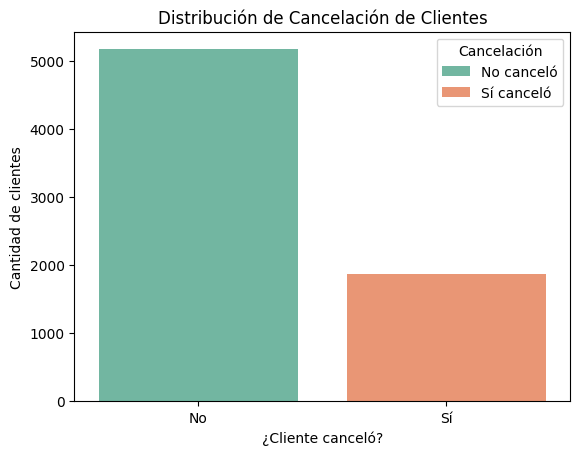

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico actualizado: usamos hue y desactivamos la leyenda
sns.countplot(x="Cancelación", hue="Cancelación", data=df, palette="Set2", legend=False,)

plt.title("Distribución de Cancelación de Clientes")
plt.xlabel("¿Cliente canceló?")
plt.ylabel("Cantidad de clientes")
plt.xticks([0, 1], ["No", "Sí"])
plt.legend(title="Cancelación", labels=["No canceló", "Sí canceló"])
plt.show()





#Recuento de evasión por variables categóricas

In [34]:
print(df["Cancelación"].value_counts(dropna=False))


Cancelación
0    5174
1    1869
Name: count, dtype: int64


In [35]:
variables_categoricas = [
    "Género",
    "Adulto_Mayor",
    "Tiene_Pareja",
    "Tiene_Dependientes",
    "Servicio_Teléfono",
    "Líneas_Múltiples",
    "Servicio_Internet",
    "Seguridad_Online",
    "Respaldo_Online",
    "Protección_Dispositivo",
    "Soporte_Técnico",
    "TV_Por_Streaming",
    "Películas_Por_Streaming",
    "Factura_Electrónica"
]



In [36]:
print(df.columns.tolist())


['ID_Cliente', 'Cancelación', 'Género', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Antigüedad_Meses', 'Servicio_Teléfono', 'Líneas_Múltiples', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Protección_Dispositivo', 'Soporte_Técnico', 'TV_Por_Streaming', 'Películas_Por_Streaming', 'Factura_Electrónica', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Método_Pago_Credit card (automatic)', 'Método_Pago_Electronic check', 'Método_Pago_Mailed check', 'Tipo_Contrato_Anual (2 años)', 'Tipo_Contrato_Mensual']


In [37]:
for col in variables_categoricas:
    df[col] = df[col].astype(str)

In [38]:
for col in variables_categoricas:
    print(f"\n--- Cancelación por {col} ---")
    print(df.groupby(col)["Cancelación"].value_counts().unstack(fill_value=0))



--- Cancelación por Género ---
Cancelación     0    1
Género                
Femenino     2549  939
Masculino    2625  930

--- Cancelación por Adulto_Mayor ---
Cancelación      0     1
Adulto_Mayor            
0             4508  1393
1              666   476

--- Cancelación por Tiene_Pareja ---
Cancelación      0     1
Tiene_Pareja            
0             2441  1200
1             2733   669

--- Cancelación por Tiene_Dependientes ---
Cancelación            0     1
Tiene_Dependientes            
0                   3390  1543
1                   1784   326

--- Cancelación por Servicio_Teléfono ---
Cancelación           0     1
Servicio_Teléfono            
0                   512   170
1                  4662  1699

--- Cancelación por Líneas_Múltiples ---
Cancelación          0    1
Líneas_Múltiples           
0                 2541  849
1                 2121  850
No phone service   512  170

--- Cancelación por Servicio_Internet ---
Cancelación           0     1
Servicio_Inter

In [39]:
def reconstruir_categoria_tipo_contrato(row):
    if row["Tipo_Contrato_Mensual"] == 1:
        return "Mensual"
    elif row.get("Tipo_Contrato_Anual (2 años)", 0) == 1:
        return "Anual (2 años)"
    else:
        return "Otro"

df["Tipo_Contrato"] = df.apply(reconstruir_categoria_tipo_contrato, axis=1)


In [40]:
df.groupby("Tipo_Contrato")["Cancelación"].value_counts().unstack()


Cancelación,0,1
Tipo_Contrato,,
Anual (2 años),1647,48
Mensual,2220,1655
Otro,1307,166


#Conteo de evasión por variables numéricas

In [41]:
df.groupby("Cancelación")[["Cargo_Total", "Antigüedad_Meses"]].mean().round(2)



<ipython-input-41-3825181812>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Cancelación")[["Cargo_Total", "Antigüedad_Meses"]].mean().round(2)


,Cargo_Total,Antigüedad_Meses
Cancelación,,
0,2554.76,37.57
1,1531.80,17.98


<ipython-input-42-849181004>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancelación", y="Cargo_Total", data=df, palette="Set2")


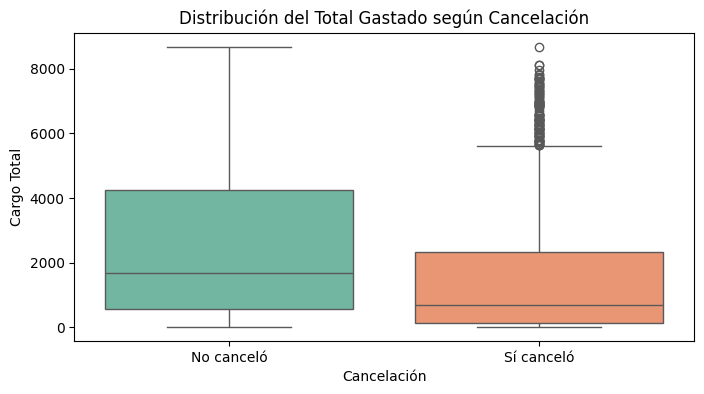

<ipython-input-42-849181004>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancelación", y="Antigüedad_Meses", data=df, palette="Set2")


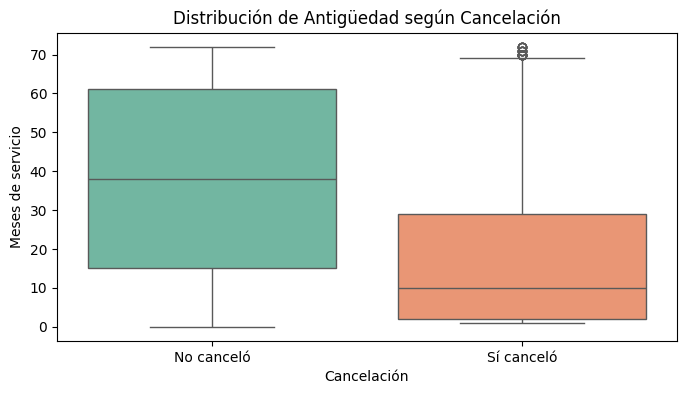

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargo Total
plt.figure(figsize=(8, 4))
sns.boxplot(x="Cancelación", y="Cargo_Total", data=df, palette="Set2")
plt.title("Distribución del Total Gastado según Cancelación")
plt.xticks([0, 1], ["No canceló", "Sí canceló"])
plt.ylabel("Cargo Total")
plt.show()

# Antigüedad
plt.figure(figsize=(8, 4))
sns.boxplot(x="Cancelación", y="Antigüedad_Meses", data=df, palette="Set2")
plt.title("Distribución de Antigüedad según Cancelación")
plt.xticks([0, 1], ["No canceló", "Sí canceló"])
plt.ylabel("Meses de servicio")
plt.show()


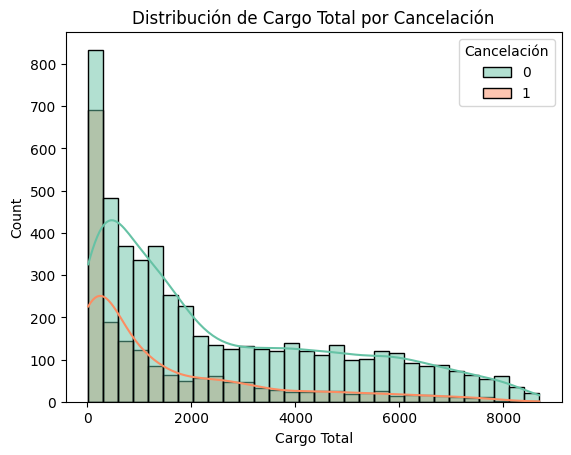

In [43]:
# Histograma del Cargo Total por cancelación
sns.histplot(data=df, x="Cargo_Total", hue="Cancelación", bins=30, kde=True, palette="Set2")
plt.title("Distribución de Cargo Total por Cancelación")
plt.xlabel("Cargo Total")
plt.show()


#📄Informe final

1. Introducción
La evasión de clientes (churn) representa uno de los mayores desafíos para las empresas de servicios, como las telecomunicaciones. Este análisis tiene como objetivo identificar los patrones que diferencian a los clientes que cancelan el servicio de aquellos que se mantienen activos.

Comprender estos patrones es fundamental para diseñar estrategias que mejoren la retención, reduzcan la pérdida de ingresos y aumenten la fidelidad del cliente.

2. Limpieza y Tratamiento de Datos
Se trabajó con un archivo JSON que contenía datos estructurados sobre cada cliente, incluyendo:

Información personal

Servicios contratados

Facturación

Estado de cancelación

  Pasos realizados:

A)Carga y normalización de datos anidados (pd.json_normalize)

B)Renombrado de columnas a español para mayor claridad

C)Conversión de valores "Yes"/"No" a binarios (1/0)

D)Corrección de valores inconsistentes como "Cancelado" en la columna Cancelación

E) Conversión de variables numéricas a float o int

 F) Generación de columnas derivadas, como "Cargo_Diario" (división del cargo mensual por 30)

3. Análisis Exploratorio de Datos

  Distribución de Cancelación

El 28.8% de los clientes han cancelado su servicio.

Se detectó un valor anómalo "Cancelado" que fue normalizado.

Comparación de variables numéricas por Cancelación
Clientes que cancelaron:

Tienen una antigüedad promedio menor (~19 meses)

Presentan un gasto total menor

Clientes que permanecen:

Muestran mayor permanencia y gasto acumulado, lo cual sugiere mayor fidelización

Visualizaciones realizadas:
Boxplots de Cargo_Total y Antigüedad_Meses por estado de cancelación

Histograma de Cargo_Total según si cancelaron o no

Gráficos de barras para analizar la distribución de cancelación por:

Género

Tipo de contrato

Servicios como Internet, Soporte Técnico, Streaming

Método de pago

4. Conclusiones e Insights
La cancelación es más frecuente en clientes con contrato mensual, lo cual indica poca fidelización.

Clientes con poco tiempo en la empresa cancelan más → posible problema de onboarding o servicio inicial.

Métodos de pago electrónicos están asociados a tasas de cancelación más altas (posible perfil de cliente menos comprometido).

Clientes que pagan más o tienen múltiples servicios contratados tienden a quedarse más tiempo.

5. Recomendaciones
Incentivos para contratos anuales: Promociones o descuentos para convertir clientes de contrato mensual a anual.

Fortalecer los primeros 3 meses: Enfocar recursos en mejorar la experiencia inicial (atención, soporte, seguimiento).

Identificar clientes con poco uso: Crear alertas para clientes con bajo consumo o gasto mensual, e intervenir con ofertas personalizadas.

Campañas específicas según método de pago: Reforzar fidelización en clientes que usan pagos electrónicos.

Desarrollar modelo predictivo de churn: Usar estos datos como base para entrenar un modelo de clasificación y anticiparse a la evasión.